# ANN on MNIST dataset (Got 99.86% accuracy) and then capturing image for prediction using openCV...
### Ameet Kumar Rana, Army Institute Of Technology Pune

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/mnist_train.csv')           #imported training dataset

In [3]:
test = pd.read_csv('data/mnist_test.csv')             #imported test dataset

In [4]:
print(train.shape)                                    #shape of datasets imported
print(test.shape)

(60000, 785)
(10000, 785)


In [5]:
train.iloc[:,0].value_counts()                        #checking the count of images under each category

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [6]:
train_x = train.iloc[:,1:785]                         #separating image and label for training dataset
train_y = train.iloc[:,0]

In [7]:
test_x = test.iloc[:,1:785]                           #separating image and label for test dataset
test_y = test.iloc[:,0]

In [8]:
train_x.shape

(60000, 784)

In [9]:
train_y.shape

(60000,)

In [10]:
test_x.shape

(10000, 784)

In [11]:
test_y.shape

(10000,)

In [12]:
from sklearn.model_selection import train_test_split    #for dividing training data into two parts

In [13]:
x_train,x_cv,y_train,y_cv = train_test_split(train_x,train_y, test_size = 0.25 , random_state = 35)

In [14]:
print(x_train.shape)
print(x_cv.shape)

print(y_train.shape)
print(y_cv.shape)

(45000, 784)
(15000, 784)
(45000,)
(15000,)


In [15]:
x_train = np.asmatrix(x_train).reshape(45000,784)           #reshaping into right diamension from flat matrix
x_cv = np.asmatrix(x_cv).reshape(15000,784)

test_x = np.asmatrix(test_x).reshape(10000,784)

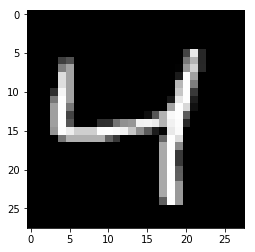

In [17]:
te = np.array(train_x.iloc[2,:])                            #checking data by printing one image
#te = np.asmatrix(te).reshape(28,28)

import matplotlib.pyplot as plt
plt.gray()
plt.imshow(te.reshape(28,28))

In [18]:
x_train = x_train.astype('float32')                          #converted each value to float datatype
x_cv = x_cv.astype('float32')

test_x = train_x.astype('float32')

In [19]:
x_train /= 255                                              #ranging values to fall them in range (0,1)
x_cv /= 255

test_x /= 255

In [20]:
import keras

Using TensorFlow backend.


In [21]:
total_dig = 10                                              #final output neurons

y_train = keras.utils.to_categorical(y_train,total_dig)        #making categorical matrix for each image label
y_cv = keras.utils.to_categorical(y_cv,total_dig)

In [22]:
print(y_train[0])
print(y_train[3])
print(y_train[45])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [24]:
classifier = Sequential()                              #created object

classifier.add(Dense(output_dim = 400, init = 'uniform' , activation = 'relu' , input_dim = 784))  #1st layer

Instructions for updating:
Colocations handled automatically by placer.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=784, units=400, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
classifier.add(Dense(output_dim = 300 , init = 'uniform' , activation = 'relu'))      #2nd layer

classifier.add(Dense(output_dim = 300 , init = 'uniform' , activation = 'relu'))     #3rd layer

classifier.add(Dense(output_dim = 300 , init = 'uniform' , activation = 'relu'))     #4th layer

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=300, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=300, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=300, kernel_initializer="uniform")`
  """


In [26]:
classifier.add(Dense(output_dim = 10 , init = 'uniform' , activation = 'softmax'))        #output layer

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [27]:
classifier.summary()                    #Dense layer summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 617,910
Trainable params: 617,910
Non-trainable params: 0
_________________________________________________________________


In [28]:
learnin_rate = 0.1                                         #learning hyperparameter
adam = optimizers.Adam(lr = learnin_rate)       #using adam which is a type of SGD

In [29]:
classifier.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

classifier.fit(x_train , y_train , batch_size = 100 , epochs = 25)       #training the data 

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
45000/45000 [==============================] - 33s 729us/step - loss: 0.3543 - acc: 0.8916
Epoch 2/25
45000/45000 [==============================] - 34s 754us/step - loss: 0.1221 - acc: 0.9632
Epoch 3/25
45000/45000 [==============================] - 36s 800us/step - loss: 0.0809 - acc: 0.9758
Epoch 4/25
45000/45000 [==============================] - 37s 820us/step - loss: 0.0609 - acc: 0.9812
Epoch 5/25
45000/45000 [==============================] - 33s 732us/step - loss: 0.0462 - acc: 0.9856
Epoch 6/25
45000/45000 [==============================] - 33s 727us/step - loss: 0.0374 - acc: 0.9885
Epoch 7/25
45000/45000 [==============================] - 32s 709us/step - loss: 0.0341 - acc: 0.9895
Epoch 8/25
45000/45000 [==============================] - 36s 795us/step - loss: 0.0283 - acc: 0.9912
Epoch 9/25
45000/45000 [==============================] - 38s 836us/step - loss: 0.0248 - acc: 0.9924
Epoch 10/25
45000/45000 [=========

In [30]:
y_pred = classifier.predict(x_cv)                 #making the prediction

In [31]:
y_pred = (y_pred > 0.5)

In [32]:
y_pred = y_pred.astype('int64')
y_cv = y_cv.astype('int64')

In [33]:
y = np.argmax(y_cv , axis = 1)
y_p = np.argmax(y_pred , axis = 1) 

In [34]:
from sklearn.metrics import confusion_matrix                   #confusion matrix to see the total no of correct output
cm = confusion_matrix(y,y_p)
cm

array([[1473,    0,    0,    0,    0,    1,    6,    0,    2,    1],
       [   0, 1677,    3,    0,    0,    1,    2,    3,    6,    1],
       [   7,    9, 1467,    3,    1,    0,    1,    9,    2,    1],
       [   2,    3,   13, 1490,    0,   12,    0,    5,    6,    1],
       [   8,    2,    6,    0, 1420,    0,    4,    6,    3,   19],
       [  10,    0,    1,    5,    3, 1296,   10,    2,    6,    2],
       [   6,    0,    2,    0,    4,    3, 1439,    0,    3,    0],
       [   1,    2,    7,    4,    4,    1,    1, 1534,    0,    4],
       [   6,    8,    7,    4,    1,    8,    4,    4, 1448,    2],
       [   6,    3,    1,    9,    6,    4,    1,   11,    8, 1433]])

In [35]:
import cv2                                    #imported openCV to capture image

In [36]:
cam = cv2.VideoCapture(0)                  #0 is for primary camera

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    cv2.imshow("test", frame)
    if not ret:
        break
    k = cv2.waitKey(1)

    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "yess_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

yess_0.png written!
Escape hit, closing...


In [37]:
img = cv2.imread('yess.jpg',cv2.IMREAD_GRAYSCALE)      #change yess to yess_0 to use your captured image to predict

In [38]:
resized = cv2.resize(img, (28,28))                     #reshaped captured image

In [39]:
resized.shape

(28, 28)

In [40]:
cv2.imshow('Resized Image',resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
det = resized.flatten()                         #processing captured image
det = det.astype('float32')
det /= 255

In [42]:
det = det.reshape(1,784)
det = det > 0.5

In [43]:
det = det.astype('int64')

In [44]:
y_det = classifier.predict(det)

In [45]:
y_det

array([[3.8737683e-10, 5.6583409e-09, 2.8384213e-06, 1.5966496e-05,
        2.0548672e-11, 2.7984294e-08, 1.1569471e-07, 1.7244189e-10,
        9.9998105e-01, 2.0698998e-09]], dtype=float32)

In [46]:
y_det.shape

(1, 10)

In [47]:
final_predicted = np.argmax(y_det , axis = 1)

In [48]:
print(final_predicted)                            #printing final captured image's prediction

[8]
